# TP2 Taillandier - Monnot
## a) Let’s consider the signal  x(t)=5*cos (628*t)
### i. Calculate the period in second [s]

In [23]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
period = (2 * np.pi) / np.abs(628)
print(f"Period: {period} seconds")

Period: 0.010005072145190424 seconds


### ii. Calculate the frequency in Hertz [Hz]

In [11]:
frequency = 1 / period
print(f"Frequency: {frequency} Hertz")

Frequency: 99.94930426171027 Hertz


### iii. Calculate the angular frequency in radian-per-second [rad/s]

In [12]:
angular_frequency = 2 * np.pi * frequency
print(f"Angular frequency: {angular_frequency} rad/s")

Angular frequency: 628.0 rad/s


### iv. What is the magnitude of this cosine?

In [13]:
x = np.linspace(0, 10, 10)
y = 5 * np.cos(628 * x)
magnitude = max(y)
print(f"Magnitude: {magnitude}")

Magnitude: 5.0


### v. What is the phase of this cosine?

#### Il n'y à pas de phase

## b) Let’s consider the above signal sampled with the sampling frequency  F_s=1kHz over 10 seconds
### i. What is the resulting length N of this signal? (i.e. how many samples?)

In [40]:
fs = 1000
samples = fs * 10
print(f"Samples: {samples}")

Samples: 10000


### ii. Construct the time axis t (from 0 to 10s)

In [20]:
x = np.linspace(0, 10, samples)

### iii. Plot the signal in the time domain (i.e.  x versus t)

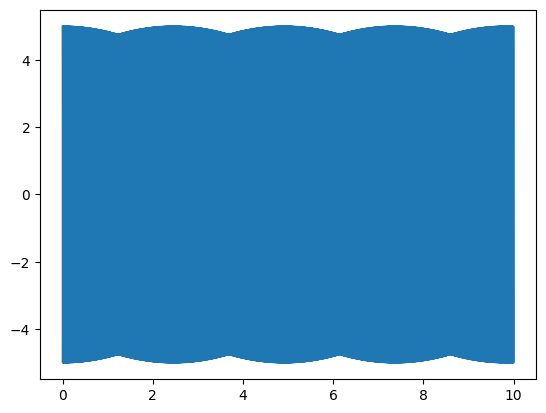

In [50]:
y = 5 * np.cos(628 * x)
plt.plot(x, y)
plt.show()

### iv. Inspect the time domain signal to measure the period of the signal (use close-ups to investigate closely the signal). Is it the same as the once calculated in a)?

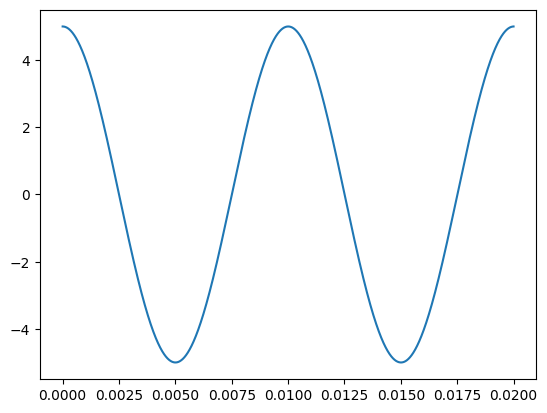

In [51]:
x2 = np.linspace(0, 0.02, samples)
y2 = 5 * np.cos(628 * x2)
plt.plot(x2, y2)
plt.show()

#### On retrouve bien la même période que celle calculé en a) : ≈ 0.01

## c) Frequency domain analysis
### i. What is the frequency resolution Δf of the signal? 

In [52]:
frequency_resolution = 1000 / samples
print(f"Frequency resolution: {frequency_resolution} Hz")

Frequency resolution: 0.1 Hz


### ii. Define a function “discrete_Fourrier_Transform()”, that takes as an input a signal and the sampling frequency, and returns as output its discrete Fourier transform X_k and the frequency axis f.

In [53]:
def discrete_fourrier_transform(signal, fs):
    fourier = []
    for k in range(fs * 10):
        xk = 0
        for i in range(fs * 10):
            xk += signal[i] * np.exp(-2 * np.pi * 1j * i * k / (fs * 10))
        fourier.append(xk)
    return fourier

### iii. Sketch the real part and imaginary part of X_k in two different plots with respect to the frequency axis f. Comment the result (the position of the harmonics, their amplitude, etc.).

In [54]:
fourrier = discrete_fourrier_transform(y, fs)

In [55]:
fourrier_r = []
fourrier_i = []
for i in range(len(fourrier)):
    fourrier_r.append(abs(fourrier[i].real))
    fourrier_i.append(abs(fourrier[i].imag))

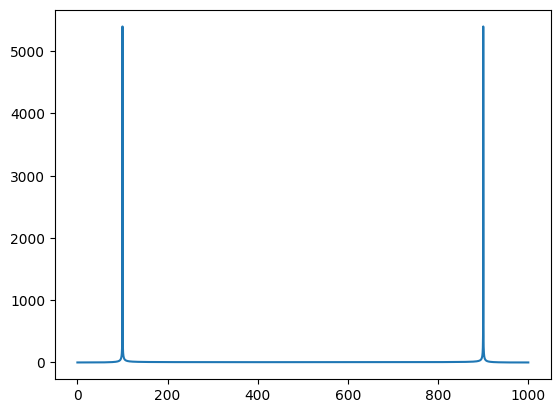

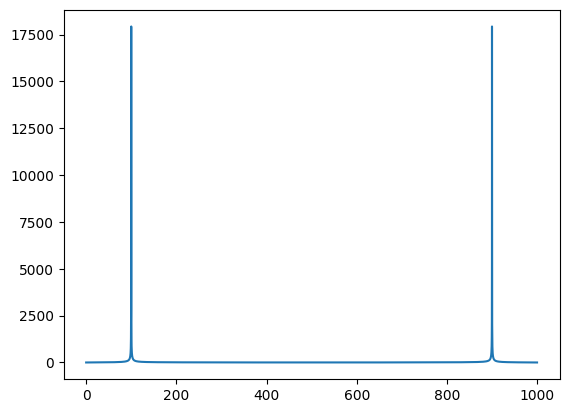

In [56]:
x_res = np.linspace(0, 1000, samples)
plt.plot(x_res, fourrier_r)
plt.show()
plt.plot(x_res, fourrier_i)
plt.show()

#### On peut observer deux piques parallèles, les parties réels et imaginaires ont leur fréquences aux mêmes positions. La partie imaginaire possède une plus grande amplitude. On observe bien un pique à l'absisce 100 qui correspond à la fréquence du signal comme calculé précédemment.


In [58]:
fourrier_norm_r = []
fourrier_norm_i = []
for i in range(len(fourrier)):
    fourrier_norm_r.append(abs(fourrier[i].real)/samples)
    fourrier_norm_i.append(abs(fourrier[i].imag)/samples)

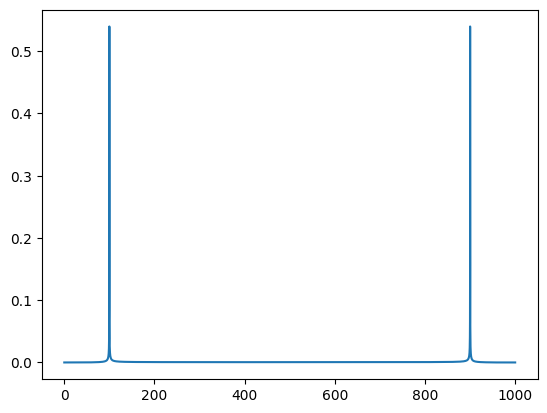

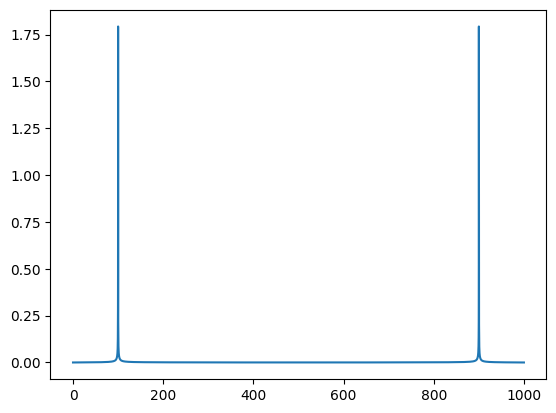

In [59]:
x_normalized = np.linspace(0, 1000, samples)
plt.plot(x_normalized, fourrier_norm_r)
plt.show()
plt.plot(x_normalized, fourrier_norm_i)
plt.show()

#### Les amplitudes varient proportionnelement à la valeur du signal mais la fréquence ne change pas.

## d) Fast Fourrier Tansform using python
### i.	Use the built-in fast Fourrier Transform to compute X_k 

In [61]:
fourrier = np.fft.fft(y)

### ii. Plot the real part and imaginary part of X_k in two different plots with respect to the frequency axis f. Comment the result (the position of the harmonics, their amplitude, etc.). Compare with the results obtained in c).

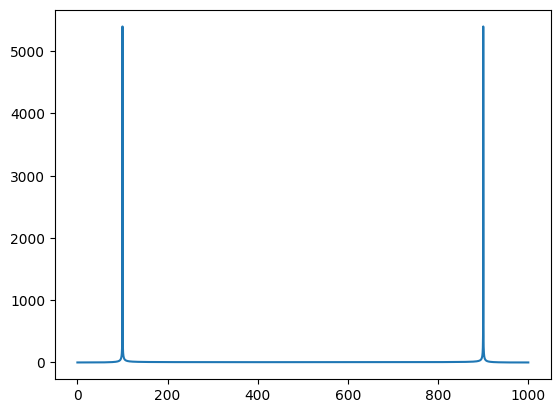

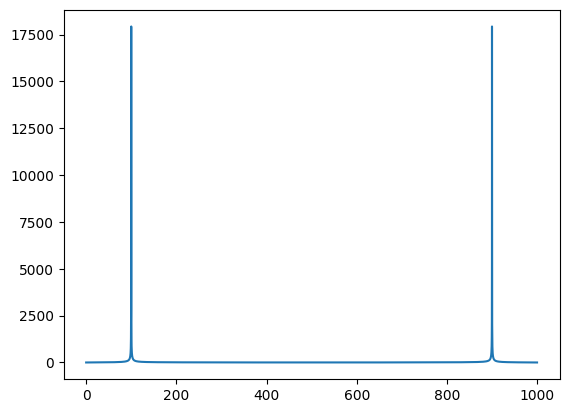

In [62]:
plt.plot(x_res, abs(fourrier.real))
plt.show()
plt.plot(x_res, abs(fourrier.imag))
plt.show()

### iii. Compute the normalized spectrum. Compare with the results obtained in c).

In [64]:
normalized_spectrum_r = []
normalized_spectrum_i = []
for i in range(len(fourrier)):
    normalized_spectrum_r.append(abs(fourrier[i].real)/samples)
    normalized_spectrum_i.append(abs(fourrier[i].imag)/samples)

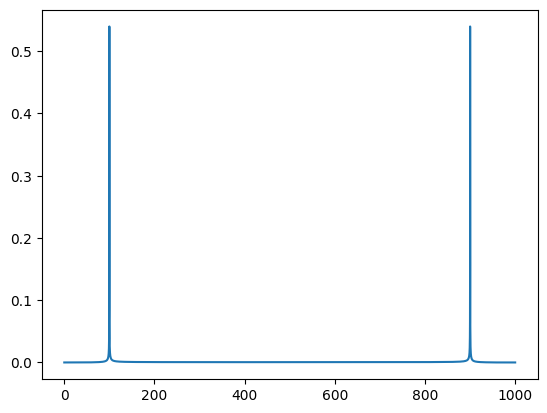

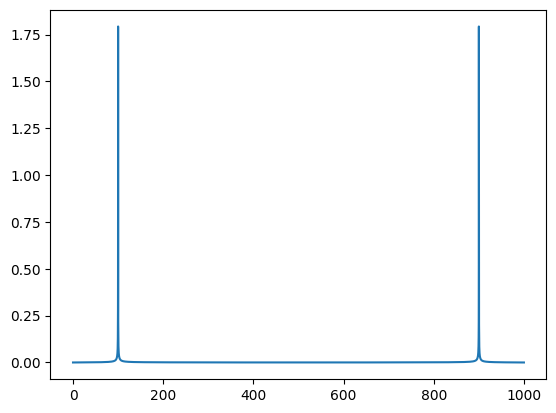

In [65]:
x_fourrier_normalized = np.linspace(0, 1000, samples)
plt.plot(x_fourrier_normalized, normalized_spectrum_r)
plt.show()
plt.plot(x_fourrier_normalized, normalized_spectrum_i)
plt.show()

#### Les graphiques sont similaires à la question c)

## e) A noisy signal: Now add a white Gaussian noise n(t) to the signal: x(t)=5□cos (628*t)+n(t). The standard deviation of the noise is σ_n=6
### i.	Plot the time domain signal.

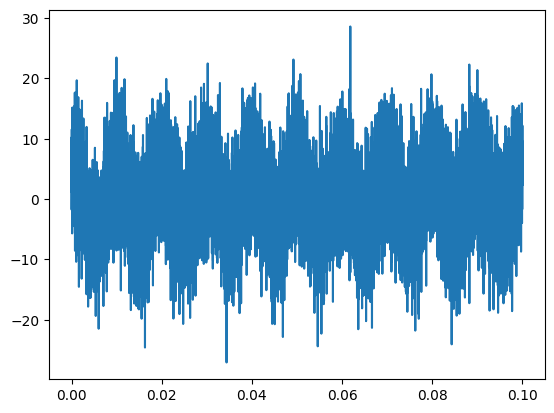

In [66]:
x = np.linspace(0, 0.1, samples)
noise = np.random.normal(0, 6, samples)
y_noise = 5 * np.cos(628 * x) + noise
plt.plot(x, y_noise)
plt.show()

In [69]:
sp_noise = np.fft.fft(y_noise)
noise_normalized_r = []
noise_normalized_i = []
for i in range(len(fourrier)):
    noise_normalized_r.append(abs(sp_noise[i].real)/samples)
    noise_normalized_i.append(abs(sp_noise[i].imag)/samples)

### ii. Plot the normalized spectrum of the signal. Comment.

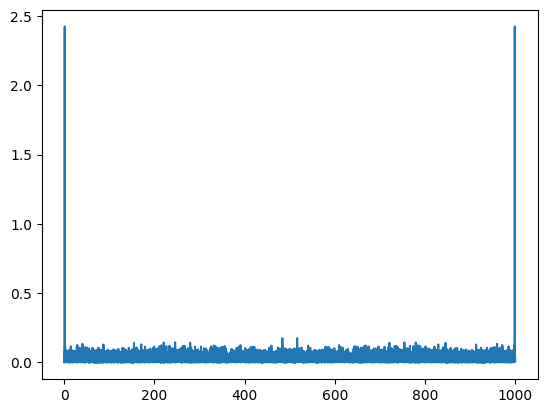

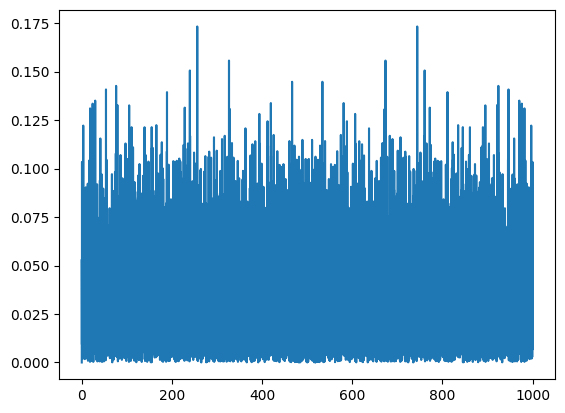

In [70]:
x_fourrier_normalized = np.linspace(0, 1000, samples)
plt.plot(x_fourrier_normalized, noise_normalized_r)
plt.show()
plt.plot(x_fourrier_normalized, noise_normalized_i)
plt.show()

#### C'est principalement la partie imaginaire qui apporte du bruit au signal complet.

### iii. Explain why it is enough to plot half the spectrum (also called one-sided spectrum)

#### Il est inutile d'afficher tout le graphiques car les piques sont symétriques à partir de la moitié de la fréquence.

# Exercice 2 : Fourier Analysis of periodic signals
## In the following, we will construct the above signal with a sampling frequency F_s=2kHz over 10s.
### a) Plot the time signal with and without noise. What is the period? Deduce the frequency of the signal.

In [ ]:
fs = 2000
samples = fs * 10
